# 🧪 Baseline Anomaly Detection with OCSVM & Isolation Forest

In [ ]:
############

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, precision_score, recall_score

## 📥 Load time series dataset

In [2]:
# Load the dataset (AirPassengers)
df = pd.read_csv("../data/AirPassengers.csv")
df.head()


,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


## 📊 Preprocess the data

In [3]:
# Scale the data
data = df['#Passengers'].values.reshape(-1, 1)

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
#print (data_scaled)

## 🧠 Train Isolation Forest

In [4]:
iso_model = IsolationForest(
    contamination=0.05,  #The amount of contamination of the data set, 
                         #Used when fitting to define the threshold on the scores of the samples.
    n_estimators=300,    #The number of base estimators in the ensemble.

    max_samples='auto',  #The number of samples to draw from X to train each base estimator.
    random_state=42      #Controls the pseudo-randomness of the selection of the feature and split values for each branching step and each tree in the forest.
)
df['isoforest_pred'] = iso_model.fit_predict(data_scaled) # -1 = anomaly



## 🧠 Train One-Class SVM

In [5]:
#svm_model = OneClassSVM(kernel='rbf', gamma='scale', nu=0.05)

svm_model = OneClassSVM(
    kernel='rbf', #kernel type to be used in the algorithm.
    gamma='scale',#Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
    tol= 0.001, #Tolerance for stopping criterion.
    nu=0.05# An upper bound on the fraction of training errors and a lower bound of the fraction of support vectors[0, 1].
)
df['ocsvm_pred'] = svm_model.fit_predict(data_scaled)  # -1 = anomaly


## 📈 Visualize anomalies

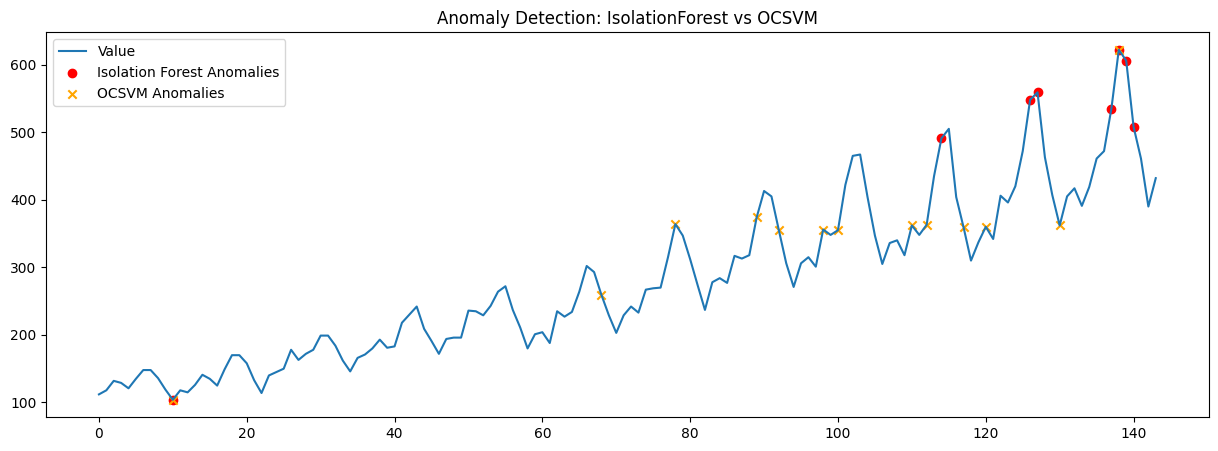

In [6]:
plt.figure(figsize=(15, 5))
plt.plot(df['#Passengers'], label='Value')
plt.scatter(df.index[df['isoforest_pred'] == -1], df['#Passengers'][df['isoforest_pred'] == -1], 
            color='red', label='Isolation Forest Anomalies')
plt.scatter(df.index[df['ocsvm_pred'] == -1], df['#Passengers'][df['ocsvm_pred'] == -1], 
            color='orange', label='OCSVM Anomalies', marker='x')
plt.legend()
plt.title('Anomaly Detection: IsolationForest vs OCSVM')
plt.show()


## ✅Evaluate with ground-truth labels (if there)

In [7]:
if 'label' in df.columns:
    print("Isolation Forest F1 Score:", f1_score(df['label'], df['isoforest_pred'] == -1))
    print("OCSVM F1 Score:", f1_score(df['label'], df['ocsvm_pred'] == -1))


## 🧪 Evaluation Metrics

In [8]:
# Adding label for anomalies 
np.random.seed(42)
df['label'] = np.random.choice([0, 1], size=len(df), p=[0.94, 0.06])  # 6% anomalies



if 'label' in df.columns:
    true_labels = df['label']
    iso_pred = df['isoforest_pred'] == -1
    svm_pred = df['ocsvm_pred'] == -1

    print("🔎 Isolation Forest:")
    print("F1 Score:", f1_score(true_labels, iso_pred))
    print("Precision:", precision_score(true_labels, iso_pred))
    print("Recall:", recall_score(true_labels, iso_pred))

    print("\n🔎 OCSVM:")
    print("F1 Score:", f1_score(true_labels, svm_pred))
    print("Precision:", precision_score(true_labels, svm_pred))
    print("Recall:", recall_score(true_labels, svm_pred))
else:
    print("⚠️ No 'label' column found. Metrics cannot be computed.")


🔎 Isolation Forest:
F1 Score: 0.23529411764705882
Precision: 0.25
Recall: 0.2222222222222222

🔎 OCSVM:
F1 Score: 0.0
Precision: 0.0
Recall: 0.0
